In [17]:
import os

import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt

from src.models.models import unet_model
from src.features.extract_features import reshape_image_unet
from src.models.utils import predict_volume
from src.data.tf_data_hdf5 import preprocess_image

ImportError: cannot import name 'preprocess_image'

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [3]:
model = unet_model(3, input_shape=(None, None, 3))

In [4]:
model_trained = tf.keras.models.load_model(
    "/home/valentin/python_wkspce/plc_segmentation/models/pretrained_unet__alpha_0.25__upsampling_upsampling__split_0__oversample_True__rangle_None__rshift_None__20211211-224814/model_weight",
    compile=False)


In [5]:
model.set_weights(model_trained.get_weights())

In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, None, None,  1841984     input_2[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, None, 5 1477120     model[0][4]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, None, None, 1 0           sequential[0][0]                 
                                                                 model[0][3]                

In [9]:
h5_file = h5py.File("../data/processed/hdf5_2d/data.hdf5", "r")
patient_list = list(h5_file)
patient_list.remove("PatientLC_63")  # Just one lung
patient_list.remove("PatientLC_72")  # the same as 70



In [11]:
patient = "PatientLC_5"
image = h5_file[patient]["image"][()]
mask = h5_file[patient]["mask"][()]
image = reshape_image_unet(image, mask[..., 2] + mask[..., 3])
image = preprocess_image(image)
prediction = predict_volume(image, model)
 

In [13]:
prediction.shape

(256, 256, 52, 3)

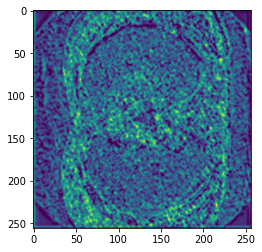

In [16]:
plt.imshow(prediction[:, :, 25, 2])
